In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


https://stackoverflow.com/questions/78634977/p-value-not-matching-test-statistic-in-kolmogorov-smirnov-test-stats-kstest

In [2]:
np.random.seed(12345)

In [3]:
pvalues = []
statistics = []
for _ in range(5_000):
    data = stats.norm.rvs(size=5_000)
    result = stats.kstest(data, stats.norm.cdf, alternative='two-sided')
    pvalues.append(result.pvalue)
    statistics.append(result.statistic)

fraction above critical stat (0.019233304448274095):  0.0484
fraction below critical stat (0.019233304448274095):  0.9516


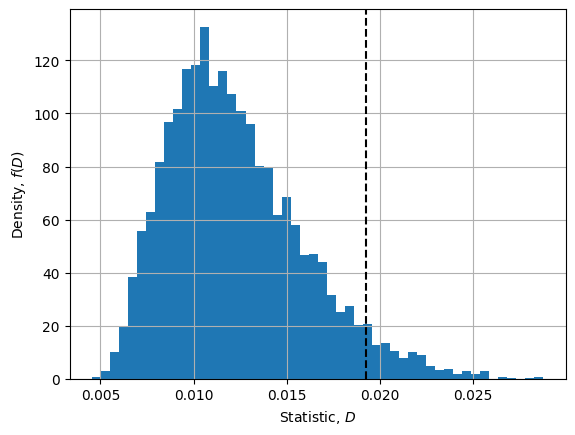

In [4]:
statistics = np.array(statistics)
stat_critical = 1.36 / (len(data) ** 0.5)
print(f'fraction above critical stat ({stat_critical}): ',len(statistics[statistics > stat_critical])/len(statistics))
print(f'fraction below critical stat ({stat_critical}): ',len(statistics[statistics < stat_critical])/len(statistics))
fig, axe = plt.subplots()
axe.hist(statistics, bins=50, density=1.)
axe.set_xlabel("Statistic, $D$")
axe.set_ylabel("Density, $f(D)$")
axe.axvline(stat_critical, linestyle="--", color="black")
axe.grid()

fraction above pvalue 0.95:  0.0538
fraction below pvalue 0.05:  0.05


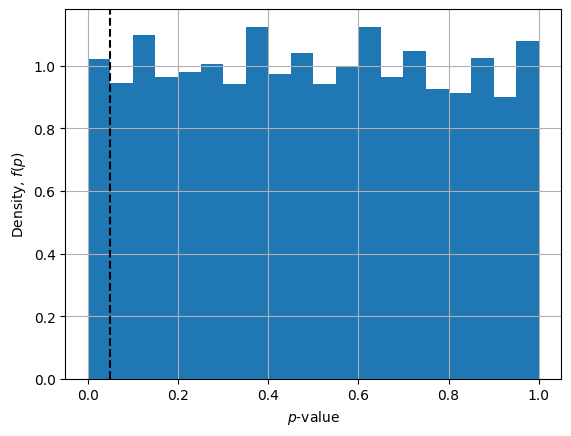

In [5]:
pvalues = np.array(pvalues)
print('fraction above pvalue 0.95: ', len(pvalues[pvalues > 0.95]) / len(pvalues))
print('fraction below pvalue 0.05: ', len(pvalues[pvalues < 0.05]) / len(pvalues))
fig, axe = plt.subplots()
axe.hist(pvalues, bins=20, density=1.)
axe.set_xlabel("$p$-value")
axe.set_ylabel("Density, $f(p)$")
axe.axvline(0.05, linestyle="--", color="black")
axe.grid()

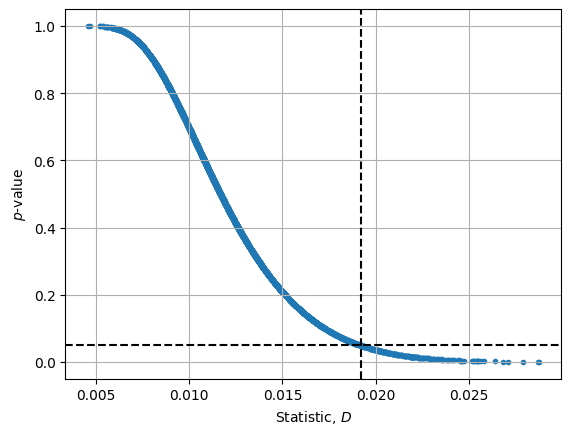

In [6]:
fig, axe = plt.subplots()
axe.scatter(statistics, pvalues, marker=".")
axe.set_xlabel("Statistic, $D$")
axe.set_ylabel("$p$-value")
axe.axhline(0.05, linestyle="--", color="black")
axe.axvline(stat_critical, linestyle="--", color="black")
axe.grid()